('Coefficients: \n', array([ 938.23786125]))
Mean squared error: 2548.07
Variance score: 0.47


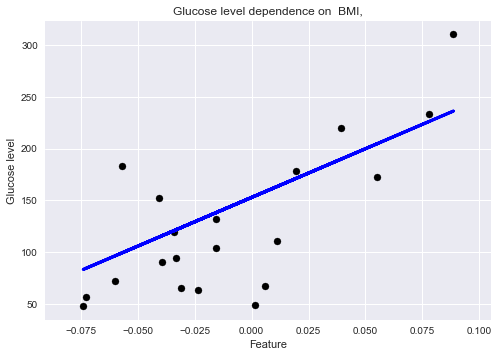

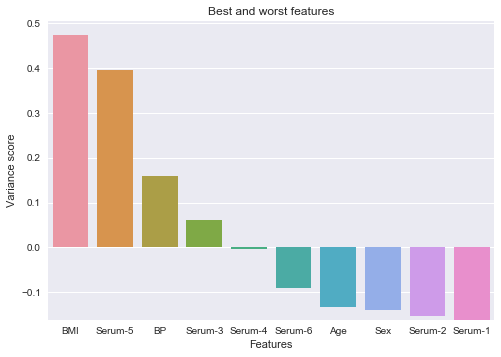

In [1]:
#### Importing necessary libraries 

import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
#Ten baseline variables, age, sex, body mass index, 
#average blood pressure, and six blood serum measurements
#were obtained for each of n = 442 diabetes patients, 
#as well as the response of interest, a quantitative measure 
#of disease progression one year after baseline.
### The dataset is explained in more detail in the following paper 
### http://web.stanford.edu/%7Ehastie/Papers/LARS/LeastAngle_2002.pdf

## The goal is to select one predictor from the set of possible predictors
## which has the largest absolute correlation with the response y
diabetes=sklearn.datasets.load_diabetes()
#print np.shape(diabetes.data)
#print np.shape(diabetes.target)
#print diabetes.data[0,:]
#print diabetes.target[:]

### We can choose different features 

## testing and training data
## We also find out which is the best feature which has the 
### maximal correlation with the response y 
cutt_off=20;
feature_list=[]
feature_var=[]
for fetur_index in range(np.shape(diabetes.data)[1]):
    diabetes_X = diabetes.data[:,np.newaxis, fetur_index]

    # Split the data into training/testing sets
    diabetes_X_train = diabetes_X[:-cutt_off]
    diabetes_X_test = diabetes_X[-cutt_off:]


    # Split the targets into training/testing sets
    diabetes_y_train = diabetes.target[:-cutt_off]
    diabetes_y_test = diabetes.target[-cutt_off:]



    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(diabetes_X_train, diabetes_y_train)


    # Make predictions using the testing set
    diabetes_y_pred = regr.predict(diabetes_X_test)


    ## testing on some random data (as expected the model is worse off)
    ### diabetes_X_test=np.random.rand(len(diabetes_X_test)).reshape(-1,1)


    # The coefficients
    #print('Coefficients: \n', regr.coef_)
    # The mean squared error
    #print("Mean squared error: %.2f"% \
    #  mean_squared_error(diabetes_y_test, diabetes_y_pred))
    # Explained variance score: 1 is perfect prediction
    ## Best possible score is 1.0 and it can be negative 
    ## (because the model can be arbitrarily worse).
    #print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))
    feature_list.append(int(fetur_index))
    feature_var.append(r2_score(diabetes_y_test, diabetes_y_pred))
        

# Plot outputs
#zipedlist=zip(feature_var,feature_list)
#sortedlist=sorted(zipedlist, key=lambda x: x[0],reverse=True)


feature_nam=['Age','Sex','BMI','BP','Serum-1',\
             'Serum-2','Serum-3','Serum-4','Serum-5','Serum-6']
zipedlist=zip(feature_list,feature_nam,feature_var)
sortedlist=sorted(zipedlist, key=lambda x: x[2],reverse=True)
fetur = zip(*sortedlist)[0]
fetnam = zip(*sortedlist)[1]
fetvar = zip(*sortedlist)[2]
fetlen=np.arange(len(zipedlist))


### Choose the best features

#bestfeature=sortedlist[0][1]
#bestfeature=np.array(sortedlist[:][:3])[:,1].tolist()
## We can choose how many features we want to use to predict the target values
numb_fetr=1
featurecolmn=np.array(sortedlist[:][:numb_fetr])[:,0].tolist()
featurecolmn=list(map(int,featurecolmn))
#featurecolmn=sortedlist[0][1]
diabetes_X = diabetes.data[:,featurecolmn]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-cutt_off]
diabetes_X_test = diabetes_X[-cutt_off:]


    # Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-cutt_off]
diabetes_y_test = diabetes.target[-cutt_off:]



    # Create linear regression object
regr = linear_model.LinearRegression()

    # Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)


    # Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
    # The mean squared error
print("Mean squared error: %.2f"% \
mean_squared_error(diabetes_y_test, diabetes_y_pred))
    # Explained variance score: 1 is perfect prediction
    ## Best possible score is 1.0 and it can be negative 
    ## (because the model can be arbitrarily worse).
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))
sns.set()
plt.scatter(diabetes_X_test[:,numb_fetr-1], diabetes_y_test,  color='black')
plt.plot(diabetes_X_test[:,numb_fetr-1], diabetes_y_pred, color='blue', linewidth=3)
all_featu=''
for index in range(numb_fetr):
    all_featu=all_featu+str(fetnam[index])+","


plt.xlabel("Feature")
plt.ylabel("Glucose level")
plt.title("Glucose level dependence on "+" "+all_featu)
plt.show()
sns.set()

sns.barplot(fetlen,fetvar)

plt.xticks(fetlen,fetnam)
plt.xlabel("Features")
plt.ylabel("Variance score")
plt.title("Best and worst features")

plt.show()



    #

